# Keras

[Keras](https://keras.io/) 是一種較 Tensorflow 更高階的深度學習框架，可以使用更少量的程式碼來建立深度學習模型，可以先熟悉 [Tensorflow 單元](/notebooks/unit/tensorflow/tenforflow.ipynb)後再來閱讀本單元。Keras 使用更低階的深度學習框架作為後端引擎，目前支援如 CNTK、Tensorflow、Theano 等知名框架。本單元將介紹 Keras 中 Model 與 Layer 的用法，並實作一個圖片分類器。

## 1. Model & Layer

在 Keras，可以宣告一個 [Model](https://keras.io/models/about-keras-models/) 物件，並透過加入一層一層的 [Layer](https://keras.io/layers/about-keras-layers/) 來建構一個神經網路，神經網路的運算(例如訓練)都可以透過該 Model 物件來操作。下方程式區段使用了 Keras 中常見的 [Sequential Model](https://keras.io/models/sequential/)，並加入了四種 Layer：

1. [Convolutional Layer](https://keras.io/layers/convolutional/)：卷積層在影像、圖片應用上，表現比全連結層(Keras 的 Dense Layer 更為優異)，參考[卷積神經網絡介紹](https://medium.com/@yehjames/4f8249d65d4f)。
2. [Pooling Layer](https://keras.io/layers/pooling/#maxpooling2d)：池化層的工作是降採樣(down sampling)，以下方程式區段使用的 MaxPooling 為例，將每個 2x2 降採樣為該區域的最大值。
3. [Flatten Layer](https://keras.io/layers/core/#flatten)：將原本多維度的資料拉平成一維，目的是讓前一層的輸出可以接到下一層(通常是全連接層)的輸入。
4. [Dense Layer](https://keras.io/layers/core/#dense)：全連結層。  

In [15]:
!pip install keras
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [16]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

model = Sequential() # Declare a sequential model

# Add a 2D convolutional layer with 64 nodes, a 3x3 filter and relu as avtivation function
# After this layer, `model.output_shape` is (None, 62, 62, 64)
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)))

# Add a 2D max pooling layer that pools the maximun value every 2x2 area
# After this layer, `model.output_shape` is (None, 31, 31, 64)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a flatten layer
# After this layer, `model.output_shape` is (None, 61504)
model.add(Flatten())

# Add a dense layer with 32 nodes and sigmoid as activation function
# After this layer, `model.output_shape` is (None, 32)
model.add(Dense(32, activation='sigmoid'))

# See `model`
model.summary() 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 61504)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1968160   
Total params: 1,969,952
Trainable params: 1,969,952
Non-trainable params: 0
_________________________________________________________________


## 2. CIFAR-10

CIFAR 的全名為 Canadian Institute for Advanced Research，是由加拿大政府出資並由多位科學家、工程師收集而成的圖片資料庫。[CIFAR-10](http://www.cs.toronto.edu/~kriz/cifar.html) 包含 60000 張 32x32x3 的 RGB 彩色圖片，其中 50000 張為訓練資料，10000 張為測試資料。CIFAR-10 有 10 種類別，0~9 分別對應為：

```
airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck
```

![CIFAR-10](./cifar_10.png)

Keras 提供[整理好的 CIFAR-10 資料](https://keras.io/datasets/#cifar10-small-image-classification)，只要透過 `import` 就可以拿到對應的訓練與測試資料。用法如下：

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)

The label of training sample 0 is [6].


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 108 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 112 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50 missing from current font.
  font.set_text(s, 0.0, fla

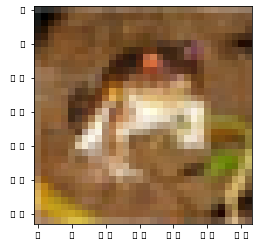

In [17]:
%matplotlib inline

import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# see the data shape
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print()

# show the i-th sample of the cifar-10 training set, try a different `i`
i = 0
plt.imshow(x_train[i])
print('The label of training sample %d is %s.' % (i, y_train[i]))

## 3. 範例模型

以下使用 Keras 實作兩種深度學習模型來進行 CIFAR-10 圖片分類。其中 DNN 只使用全連接層，而 CNN 多使用了卷積層。相較於 [Tensorflow 單元](/notebooks/unit/tensorflow/tenforflow.ipynb)的 MNIST 資料，CIFAR-10 的圖片比較複雜且為彩色，更能發揮卷積層的效果。也因此相較於 DNN，CNN 應該更容易得到好的結果。注意比較以下兩個程式區段，使用 CNN 時不需要將圖片 reshape 為一維向量。當然，CNN 也能處理 reshape 過的一維向量。CNN 的初學者可以參考以下連結：

* [A Beginner's Guide To Understanding Convolutional Neural Networks](https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks/)
* [深度學習(2)--使用Tensorflow實作卷積神經網路(Convolutional neural network，CNN)](http://arbu00.blogspot.tw/2017/03/2-tensorflowconvolutional-neural.html)

![Convolutional Neural Network](https://adeshpande3.github.io/assets/Cover.png)

In [18]:
# DNN

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

x_tr_dnn = x_train[:10000].astype('float32')
x_te_dnn = x_test.astype('float32')

# note that the CNN version does not need to reshape the input
x_tr_dnn = x_tr_dnn.reshape(-1, 3072)
x_te_dnn = x_te_dnn.reshape(-1, 3072)

# normalize
x_tr_dnn /= 255
x_te_dnn /= 255

# one-hot encoding
y_tr_dnn = to_categorical(y_train[:10000], num_classes=10)
y_te_dnn = to_categorical(y_test, num_classes=10)

# options
epochs = 20
batch_size = 128 
learning_rate = 0.001

# model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(3072,)))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# train
model.fit(x_tr_dnn, y_tr_dnn, batch_size=batch_size, epochs=epochs, shuffle=True, validation_data=(x_te_dnn, y_te_dnn))

Epoch 1/20
79/79 [==============================] - 1s 9ms/step - loss: 2.1631 - accuracy: 0.2127 - val_loss: 1.9733 - val_accuracy: 0.2858
Epoch 2/20
79/79 [==============================] - 0s 6ms/step - loss: 1.9361 - accuracy: 0.2961 - val_loss: 1.9814 - val_accuracy: 0.2714
Epoch 3/20
79/79 [==============================] - 0s 6ms/step - loss: 1.8922 - accuracy: 0.3163 - val_loss: 1.8832 - val_accuracy: 0.3351
Epoch 4/20
79/79 [==============================] - 0s 6ms/step - loss: 1.8323 - accuracy: 0.3419 - val_loss: 1.8485 - val_accuracy: 0.3376
Epoch 5/20
79/79 [==============================] - 0s 6ms/step - loss: 1.7886 - accuracy: 0.3651 - val_loss: 1.8248 - val_accuracy: 0.3527
Epoch 6/20
79/79 [==============================] - 0s 6ms/step - loss: 1.7722 - accuracy: 0.3715 - val_loss: 1.8044 - val_accuracy: 0.3610
Epoch 7/20
79/79 [==============================] - 0s 6ms/step - loss: 1.7454 - accuracy: 0.3793 - val_loss: 1.8637 - val_accuracy: 0.3455
Epoch 8/20
79/79 [==

In [19]:
# CNN

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

x_tr_cnn = x_train[:10000].astype('float32')
x_te_cnn = x_test.astype('float32')

# normalize
x_tr_cnn /= 255
x_te_cnn /= 255

# one-hot encoding
y_tr_cnn = to_categorical(y_train[:10000], num_classes=10)
y_te_cnn = to_categorical(y_test, num_classes=10)

# options
epochs = 20
batch_size = 128 
learning_rate = 0.001

# model
model = Sequential()

# the input shape for cifar-10 is (32, 32, 3)
# use `Conv2D(#neurons, (filter_size))` to add convolutionary layers
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu'))

# use `MaxPooling2D()` to add pooling layers
# model.add(MaxPooling2D((2, 2)))

# TODO: add more convolutionary and/or pooling layers here

# in practice, fully-connected layers are added after convolutionary and pooling ones 
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# train
model.fit(x_tr_cnn, y_tr_cnn, batch_size=batch_size, epochs=epochs, shuffle=True, validation_data=(x_te_cnn, y_te_cnn))

Epoch 1/20


UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node sequential_5/conv2d_6/Relu (defined at <ipython-input-19-56112dc6284a>:41) ]] [Op:__inference_train_function_9691]

Function call stack:
train_function


## 4. 作業
若依照以上範例的設定，經過 20 輪訓練後，DNN 可以到達約 40% 的正確率，而 CNN 可以達到約 50% 的正確率。請更改 DNN 或是 CNN 的架構來改善模型。validation 的準確度即為本次作業分數

提示：
1. 調整訓練輪數(`epochs`)
2. 調整批次大小(`batch_size`)
3. 調整學習速率(`learning_rate`)
4. 增加層數
5. 調整每層的神經元數量
6. 參考經典網路架構

In [28]:
# CNN

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten


import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_tr_cnn = x_train.astype('float32')
x_te_cnn = x_test.astype('float32')

# normalize
x_tr_cnn /= 255
x_te_cnn /= 255

# one-hot encoding
y_tr_cnn = to_categorical(y_train, num_classes=10)
y_te_cnn = to_categorical(y_test, num_classes=10)

# options
epochs = 20
batch_size = 128 
learning_rate = 0.001

# model
model = Sequential()

# the input shape for cifar-10 is (32, 32, 3)
# use `Conv2D(#neurons, (filter_size))` to add convolutionary layers
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='selu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='selu'))
model.add(MaxPooling2D((2, 2)))

# in practice, fully-connected layers are added after convolutionary and pooling ones 
model.add(Flatten())
model.add(Dense(256, activation='selu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# train
model.fit(x_tr_cnn, y_tr_cnn, batch_size=batch_size, epochs=epochs, shuffle=True, validation_data=(x_te_cnn, y_te_cnn))

Epoch 1/20


UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node sequential_10/conv2d_15/Conv2D (defined at <ipython-input-28-351ccd117c2d>:47) ]] [Op:__inference_train_function_13751]

Function call stack:
train_function
